# Bank Note Authentication using K-Means Clustering
> Written by Kieran Shand

## General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('bank_note.csv')

In [3]:
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [17]:
df['Class'].value_counts()
#The Class variable shows whether the bank note is genuine or counterfeit (1 genuine, 2 forged) 

1    762
2    610
Name: Class, dtype: int64

In [5]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


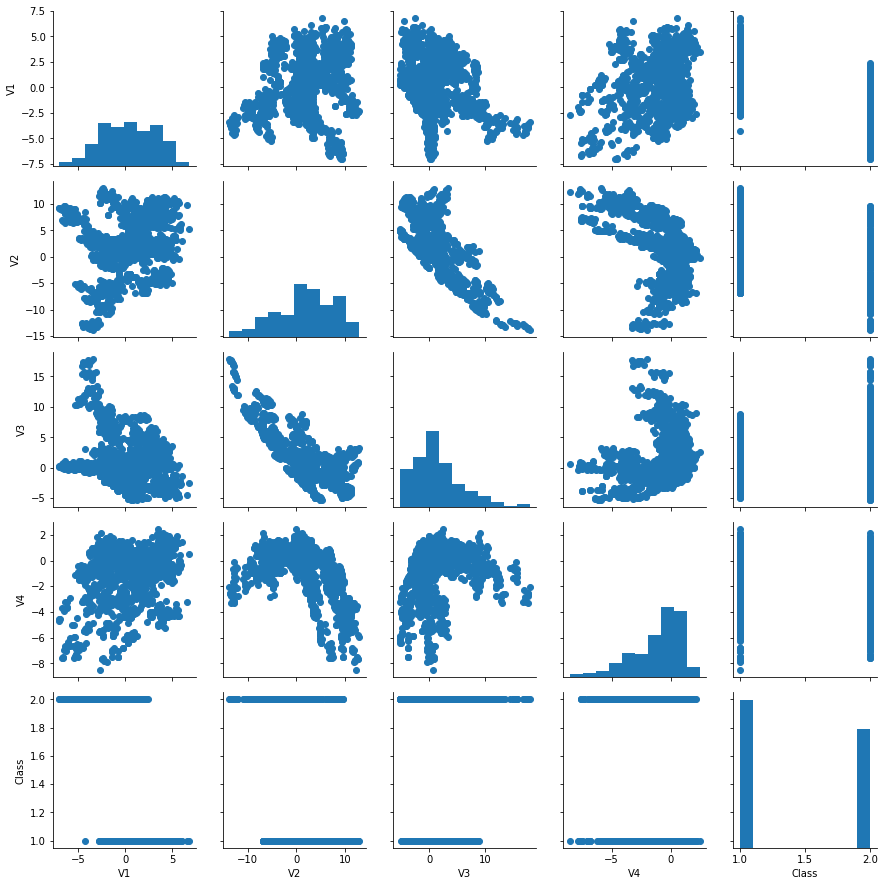

In [6]:
g = sb.PairGrid(data = df, vars = ['V1', 'V2', 'V3', 'V4', 'Class'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.savefig('image_1.png', dpi = 300);

## Modelling using K-Means

In [38]:
v1 = df['V1']
v4 = df['V4']

variable_stack = np.column_stack((v1, v4))
km_res = KMeans(n_clusters=2).fit(variable_stack)
clusters = km_res.cluster_centers_

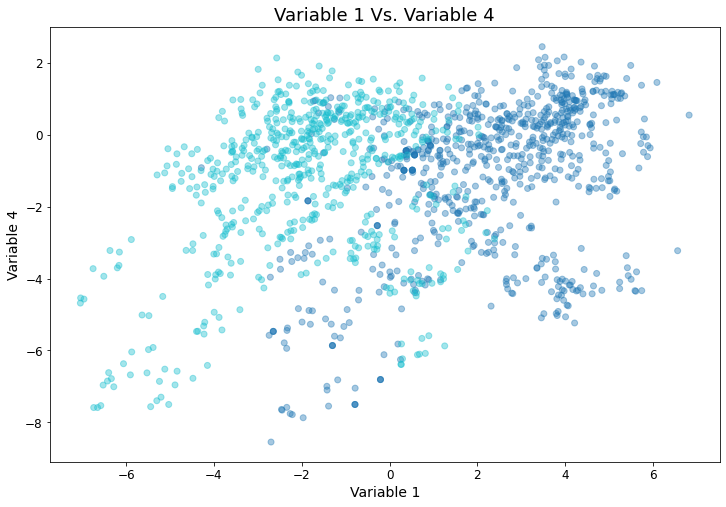

In [32]:
plt.figure(figsize=[12,8])
plt.title('Variable 1 Vs. Variable 4',fontsize=18)
plt.xlabel('Variable 1', fontsize=14)
plt.ylabel('Variable 4',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(v1, v4, alpha = 0.4, c=df['Class'], cmap='tab10')
plt.savefig('image_2.png', dpi = 300);

#V1 and V4 are nicely clustered as the colouring shows 
#This makes it easy to evluate how well the model fits our data

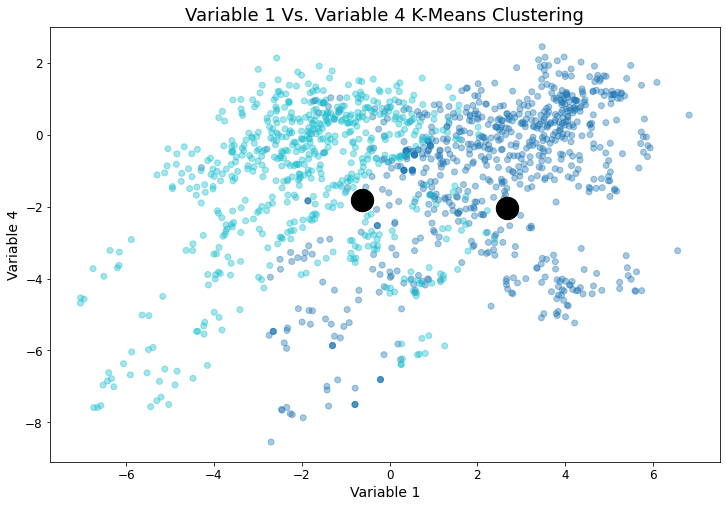

In [39]:
plt.figure(figsize=[12,8])
plt.title('Variable 1 Vs. Variable 4 K-Means Clustering',fontsize=18)
plt.xlabel('Variable 1', fontsize=14)
plt.ylabel('Variable 4',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(v1, v4, alpha = 0.4, c=df['Class'], cmap='tab10')
plt.scatter(clusters[0], clusters[1], s=500, c='k')
plt.savefig('image_3.png', dpi = 300);

#I have applied the two centroids onto the visualisation
#The centroids are found amongst both the genuine and counterfeit bank notes, showing the model fits the data well  